In [42]:
from sklearn.linear_model import LinearRegression
from itertools import product
import pandas as pd
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
import yfinance as yf

pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")
from itertools import product

In [43]:
symbol = "EURUSD=X"
start = "2024-06-22"
end = "2024-08-10"
interval = '15m'

In [44]:
df = yf.download(symbol, start, end, interval=interval).Close.to_frame()
df.rename(columns={"Close": "price"}, inplace=True)
df['returns'] = np.log(df['price'].div(df['price'].shift(1)))
df

[*********************100%%**********************]  1 of 1 completed


,price,returns
Datetime,,
2024-06-24 00:00:00,1.069747,NaN
2024-06-24 00:15:00,1.069404,-0.000321
2024-06-24 00:30:00,1.069290,-0.000107
2024-06-24 00:45:00,1.069061,-0.000214
2024-06-24 01:00:00,1.068833,-0.000214
...,...,...
2024-08-09 21:15:00,1.092061,0.000109
2024-08-09 21:30:00,1.091941,-0.000109
2024-08-09 21:45:00,1.091822,-0.000109


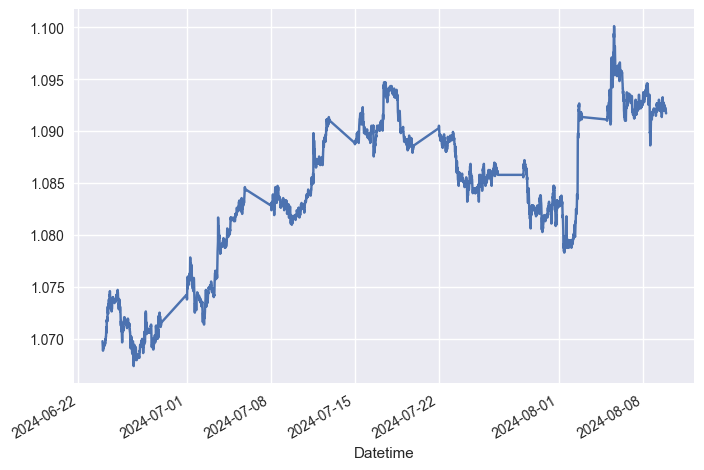

In [45]:
df.price.plot()
plt.show()

In [46]:
df['lag1'] = df.returns.shift(1)
df.dropna(inplace=True)
df

,price,returns,lag1
Datetime,,,
2024-06-24 00:30:00,1.069290,-0.000107,-0.000321
2024-06-24 00:45:00,1.069061,-0.000214,-0.000107
2024-06-24 01:00:00,1.068833,-0.000214,-0.000214
2024-06-24 01:15:00,1.069061,0.000214,-0.000214
2024-06-24 01:30:00,1.069404,0.000321,0.000214
...,...,...,...
2024-08-09 21:15:00,1.092061,0.000109,-0.000218
2024-08-09 21:30:00,1.091941,-0.000109,0.000109
2024-08-09 21:45:00,1.091822,-0.000109,-0.000109


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3317 entries, 2024-06-24 00:30:00 to 2024-08-09 22:15:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    3317 non-null   float64
 1   returns  3317 non-null   float64
 2   lag1     3317 non-null   float64
dtypes: float64(3)
memory usage: 103.7 KB


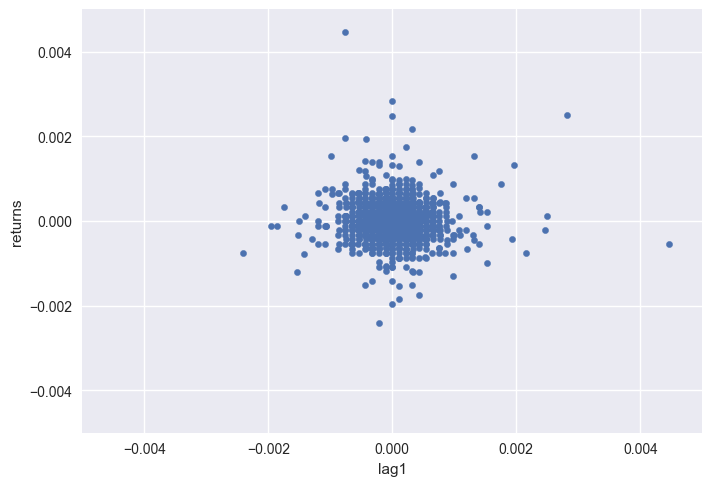

In [48]:
df.plot(kind='scatter', x='lag1', y='returns')
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.show()

In [49]:
lm = LinearRegression(fit_intercept=True)
lm.fit(df.lag1.to_frame(), df.returns)
slope = lm.coef_
slope

array([-0.03298108])

In [50]:
intercept = lm.intercept_
intercept

np.float64(6.42361927923654e-06)

In [51]:
df['pred'] = lm.predict(df.lag1.to_frame())
df

,price,returns,lag1,pred
Datetime,,,,
2024-06-24 00:30:00,1.069290,-0.000107,-0.000321,0.000017
2024-06-24 00:45:00,1.069061,-0.000214,-0.000107,0.000010
2024-06-24 01:00:00,1.068833,-0.000214,-0.000214,0.000013
2024-06-24 01:15:00,1.069061,0.000214,-0.000214,0.000013
2024-06-24 01:30:00,1.069404,0.000321,0.000214,-0.000001
...,...,...,...,...
2024-08-09 21:15:00,1.092061,0.000109,-0.000218,0.000014
2024-08-09 21:30:00,1.091941,-0.000109,0.000109,0.000003
2024-08-09 21:45:00,1.091822,-0.000109,-0.000109,0.000010


Text(0, 0.5, 'Returns')

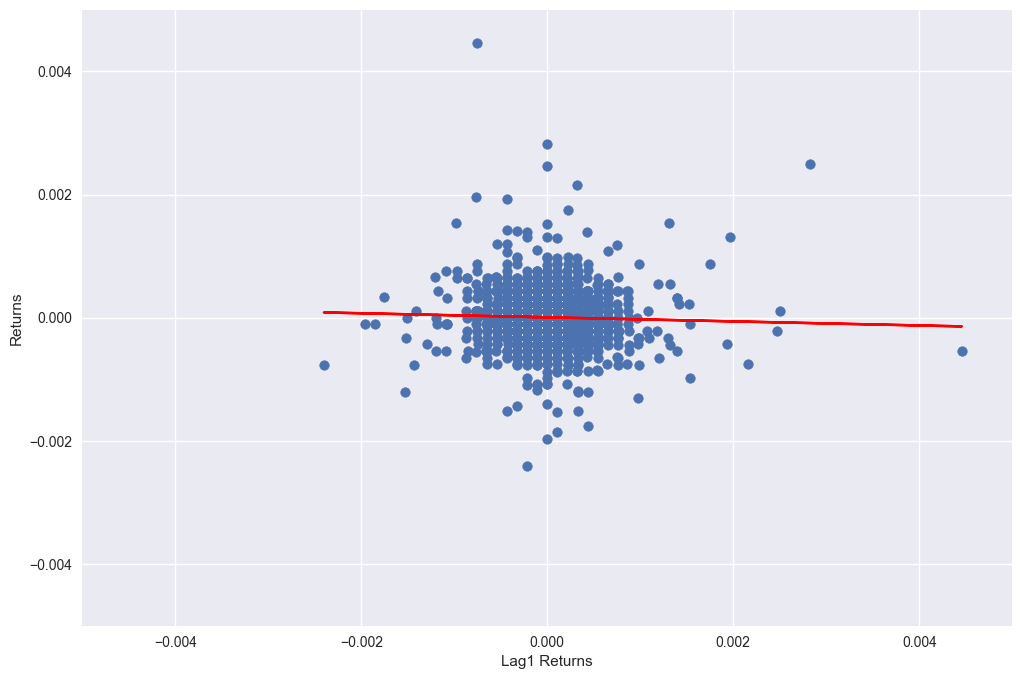

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.lag1, y=df.returns, label="DATA")
plt.plot(df.lag1, df.pred, c="red", label = "Linear Regression")
plt.xlim(-0.005, 0.005)
plt.ylim(-0.005, 0.005)
plt.xlabel("Lag1 Returns")
plt.ylabel("Returns")

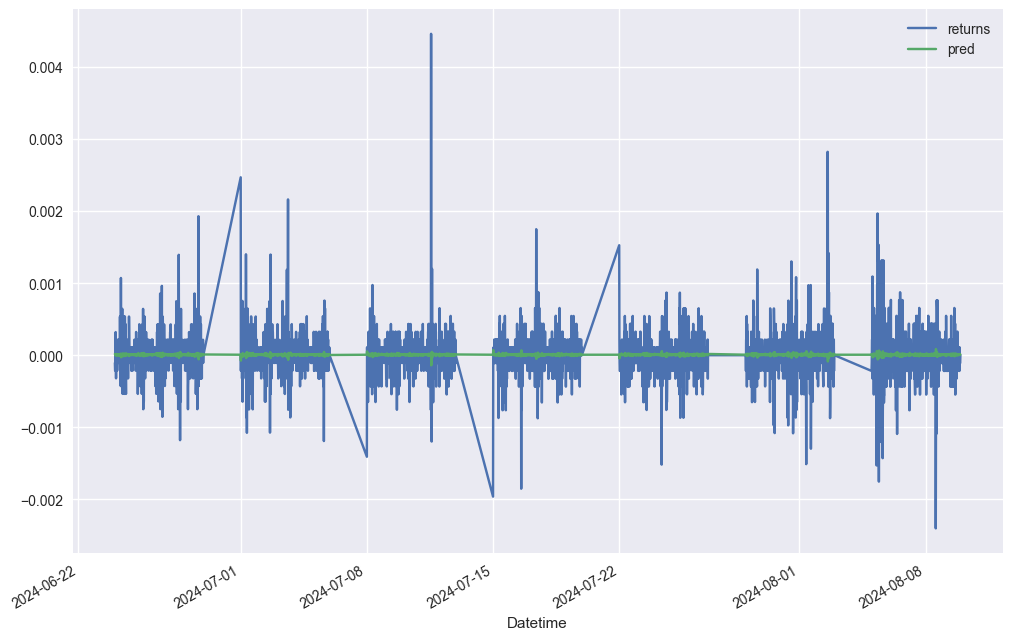

In [53]:
df[['returns', 'pred']].plot(figsize=(12,8))
plt.show()

In [55]:
df.pred = np.sign(df.pred)
df

,price,returns,lag1,pred
Datetime,,,,
2024-06-24 00:30:00,1.069290,-0.000107,-0.000321,1.000000
2024-06-24 00:45:00,1.069061,-0.000214,-0.000107,1.000000
2024-06-24 01:00:00,1.068833,-0.000214,-0.000214,1.000000
2024-06-24 01:15:00,1.069061,0.000214,-0.000214,1.000000
2024-06-24 01:30:00,1.069404,0.000321,0.000214,-1.000000
...,...,...,...,...
2024-08-09 21:15:00,1.092061,0.000109,-0.000218,1.000000
2024-08-09 21:30:00,1.091941,-0.000109,0.000109,1.000000
2024-08-09 21:45:00,1.091822,-0.000109,-0.000109,1.000000


In [56]:
np.sign(df.returns * df.pred)

Datetime
2024-06-24 00:30:00   -1.000000
2024-06-24 00:45:00   -1.000000
2024-06-24 01:00:00   -1.000000
2024-06-24 01:15:00    1.000000
2024-06-24 01:30:00   -1.000000
                         ...   
2024-08-09 21:15:00    1.000000
2024-08-09 21:30:00   -1.000000
2024-08-09 21:45:00   -1.000000
2024-08-09 22:00:00   -1.000000
2024-08-09 22:15:00    0.000000
Length: 3317, dtype: float64

In [57]:
hits = np.sign(df.returns * df.pred).value_counts()
hits

1.000000     1393
-1.000000    1216
0.000000      708
Name: count, dtype: int64

In [59]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

np.float64(0.4199577931866144)